# Car Price Prediction Challenge_ Machine Learning Regrission Model Part 2

# 1) Feature Eng
# 2) Model Ml & Evalution

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Set warnings to be ignored
warnings.filterwarnings("ignore")

Data_sets_after_Analysis = pd.read_csv(r"C:\Users\islam\Downloads\AI Work\Car's Price Prediction\Data_sets_after_Analysis.csv")
Data_sets_after_Analysis

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0,14
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0,13
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0,18
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0,0,13
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2-3,Left wheel,Silver,5,1,25
17865,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0,13
17866,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4-5,Left wheel,Grey,4,0,14
17867,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4-5,Left wheel,Black,4,0,17


In [22]:
df=Data_sets_after_Analysis

In [23]:
df1=df #df1 to be used for Leaveoneout encoding
df2=df #df2 to be used for Target encoding

## Encoding before Modeling

We will try 3 different techniques

1) One hot encode all categorical features. This will create a lot of dimensions, let's see how the model handles it

2) Leaveoneout encoding Manufacturer, Model and Category, rest will be one hot encoded

2) Target encode Manufacturer, Model and Category, rest will be one hot encoded

## Encoding option 1

1) One hot encoding all categorical columns

In [24]:
from sklearn.preprocessing import  OneHotEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)
df_encoded

Price         Levy  Prod. year  Engine volume   Mileage  Cylinders  \
0      13328  1399.000000        2010            3.5  186005.0        6.0   
1      16621  1018.000000        2011            3.0  192000.0        6.0   
2       8467   906.299205        2006            1.3  200000.0        4.0   
3       3607   862.000000        2011            2.5  168966.0        4.0   
4      11726   446.000000        2014            1.3   91901.0        4.0   
...      ...          ...         ...            ...       ...        ...   
17864   8467   906.299205        1999            2.0  300000.0        4.0   
17865  15681   831.000000        2011            2.4  161600.0        4.0   
17866  26108   836.000000        2010            2.0  116365.0        4.0   
17867   5331  1288.000000        2007            2.0   51258.0        4.0   
17868    470   753.000000        2012            2.4  186923.0        4.0   

       Airbags  Turbo  Age  Manufacturer_ALFA ROMEO  Manufacturer_AUDI  \
0           12      0   14                    False              False   
1            8      0   13                    False              False   
2            2      0   18                    False              False   
3            0      0   13                    False              False   
4            4      0   10                    False              False   
...        ...    ...  ...                      ...                ...   
17864        5      1   25                    False              False   
17865        8      0   13                    False              False   
17866        4      0   14                    False              False   
17867        4      0   17                    False              False   
17868       12      0   12                    False              False   

       Manufacturer_BMW  Manufacturer_BUICK  Manufacturer_CADILLAC  \
0                 False               False                  False   
1                 False               False                  False   
2                 False               False                  False   
3                 False               False                  False   
4                 False               False                  False   
...                 ...                 ...                    ...   
17864             False               False                  False   
17865             False               False                  False   
17866             False               False                  False   
17867             False               False                  False   
17868             False               False                  False   

       Manufacturer_CHEVROLET  Manufacturer_CHRYSLER  Manufacturer_CITROEN  \
0                       False                  False                 False   
1                        True                  False                 False   
2                       False                  False                 False   
3                       False                  False                 False   
4                       False                  False                 False   
...                       ...                    ...                   ...   
17864                   False                  False                 False   
17865                   False                  False                 False   
17866                   False                  False                 False   
17867                    True                  False                 False   
17868                   False                  False                 False   

       Manufacturer_DAEWOO  Manufacturer_DAIHATSU  Manufacturer_DODGE  \
0                    False                  False               False   
1                    False                  False               False   
2                    False                  False               False   
3                    False                  False               False   
4                    False                  False 

## replace True/False with 1 and 0

In [26]:
# Loop through columns
for column in df_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if df_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        df_encoded[column] = df_encoded[column].astype(int)

df_encoded


Price         Levy  Prod. year  Engine volume   Mileage  Cylinders  \
0      13328  1399.000000        2010            3.5  186005.0        6.0   
1      16621  1018.000000        2011            3.0  192000.0        6.0   
2       8467   906.299205        2006            1.3  200000.0        4.0   
3       3607   862.000000        2011            2.5  168966.0        4.0   
4      11726   446.000000        2014            1.3   91901.0        4.0   
...      ...          ...         ...            ...       ...        ...   
17864   8467   906.299205        1999            2.0  300000.0        4.0   
17865  15681   831.000000        2011            2.4  161600.0        4.0   
17866  26108   836.000000        2010            2.0  116365.0        4.0   
17867   5331  1288.000000        2007            2.0   51258.0        4.0   
17868    470   753.000000        2012            2.4  186923.0        4.0   

       Airbags  Turbo  Age  Manufacturer_ALFA ROMEO  Manufacturer_AUDI  \
0           12      0   14                        0                  0   
1            8      0   13                        0                  0   
2            2      0   18                        0                  0   
3            0      0   13                        0                  0   
4            4      0   10                        0                  0   
...        ...    ...  ...                      ...                ...   
17864        5      1   25                        0                  0   
17865        8      0   13                        0                  0   
17866        4      0   14                        0                  0   
17867        4      0   17                        0                  0   
17868       12      0   12                        0                  0   

       Manufacturer_BMW  Manufacturer_BUICK  Manufacturer_CADILLAC  \
0                     0                   0                      0   
1                     0                   0                      0   
2                     0                   0                      0   
3                     0                   0                      0   
4                     0                   0                      0   
...                 ...                 ...                    ...   
17864                 0                   0                      0   
17865                 0                   0                      0   
17866                 0                   0                      0   
17867                 0                   0                      0   
17868                 0                   0                      0   

       Manufacturer_CHEVROLET  Manufacturer_CHRYSLER  Manufacturer_CITROEN  \
0                           0                      0                     0   
1                           1                      0                     0   
2                           0                      0                     0   
3                           0                      0                     0   
4                           0                      0                     0   
...                       ...                    ...                   ...   
17864                       0                      0                     0   
17865                       0                      0                     0   
17866                       0                      0                     0   
17867                       1                      0                     0   
17868                       0                      0                     0   

       Manufacturer_DAEWOO  Manufacturer_DAIHATSU  Manufacturer_DODGE  \
0                        0                      0                   0   
1                        0                      0                   0   
2                        0                      0                   0   
3                        0                      0                   0   
4                        0                      0 

## Modelling #1

For each iteriation with different encodings, we will run 3 different baseline models. Scale data after data split and display MAE and R2 on training and evaluation data. We will also plot actual vs predictions on a kde plot along with feature importance charts.

In [4]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Separate the target variable (Price) and independent variables
X = df_encoded.drop(columns=['Price','Cylinders'])
y = df_encoded['Price']

# Split the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the evaluation data using the same scaler
X_eval_scaled = scaler.transform(X_eval)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Models dictionary
models = {'RandomForest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model}

# Results dictionary
results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

# Loop through models
for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Predictions on the scaled training set
    y_train_pred = model.predict(X_train_scaled)

    # Predictions on the scaled evaluation set
    y_eval_pred = model.predict(X_eval_scaled)

    # Calculate MAE and R-squared for training and evaluation sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    # Append results to the dictionary
    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 7565, number of used features: 129
[LightGBM] [Info] Start training from score 16251.225248


,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForest,1094.507306,2911.184841,0.974053,0.809829
1,XGBoost,2539.849052,3310.313359,0.896371,0.796587
2,LightGBM,2785.484610,3212.297195,0.868723,0.807651


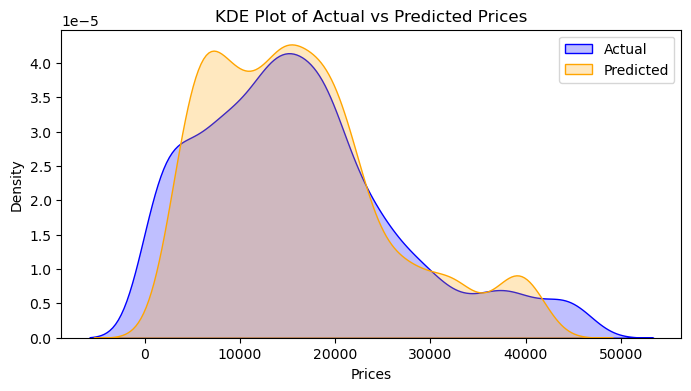

In [5]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y_eval, 'Predicted': y_eval_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

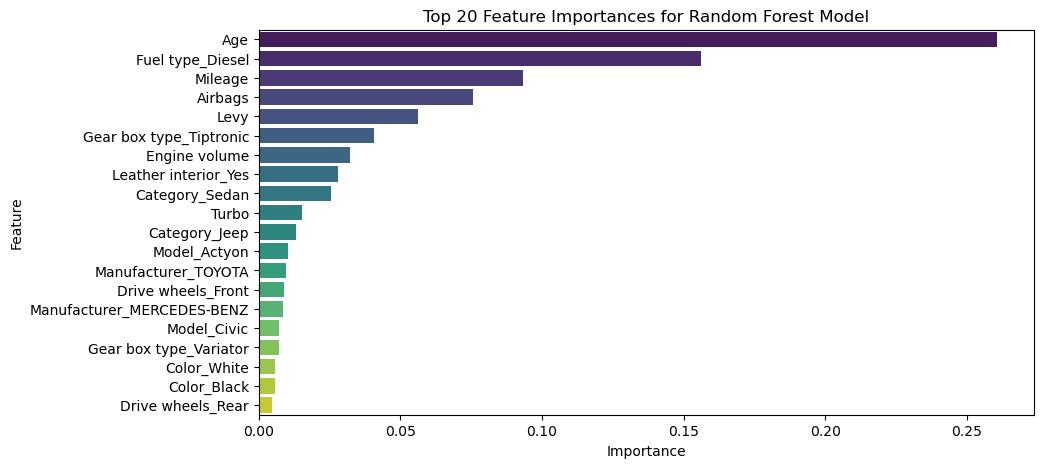

In [6]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the column names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Encoding Option #2

2) Leaveoneout encoding for Manufacturer, Model and Category. Rest is one hot encoded

Leave-One-Out Encoding (LOO Encoding) is a technique used in feature engineering for categorical variables, particularly in the context of supervised machine learning. It involves encoding categorical variables by calculating the mean of the target variable for each category, excluding the current instance being encoded. The process is as follows:

For each instance in a category, compute the mean of the target variable for all other instances in the same category.
Replace the original categorical value with the computed mean for that instance.
This technique aims to provide a more robust encoding by avoiding data leakage, as it calculates the mean by excluding the target value of the instance being encoded.

Advantages of Leave-One-Out Encoding:

Reduced Data Leakage:

LOO Encoding is designed to mitigate data leakage issues that can arise in target encoding, especially when there is a risk of overfitting to the target variable.

Preservation of Information:

By excluding the target value of the instance being encoded, LOO Encoding attempts to provide an unbiased estimate of the category's impact on the target variable.

Effective for Low Cardinality:

Particularly useful for categorical variables with low cardinality, where the number of instances in a category is limited.

Adaptability:

LOO Encoding can be adapted to different models and is applicable in various supervised learning scenarios.

Avoidance of Overfitting:

When used cautiously, LOO Encoding can help avoid overfitting to the target variable by providing a more general encoding strategy.

In [7]:
from category_encoders import LeaveOneOutEncoder

# Select the columns to be encoded
columns_to_encode = ['Manufacturer', 'Model', 'Category']

# Initialize the LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=columns_to_encode)

# Fit and transform the entire DataFrame
df1_encoded = encoder.fit_transform(df1[columns_to_encode], df1['Price'])

# Concatenate the encoded columns with the original DataFrame
df1 = pd.concat([df1, df1_encoded.add_suffix('_LOO')], axis=1)

df1

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age,Manufacturer_LOO,Model_LOO,Category_LOO
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,...,4x4,4-5,Left wheel,Silver,12,0,14,12119.823308,7071.267081,17376.580781
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,...,4x4,4-5,Left wheel,Black,8,0,13,13760.357843,7028.894737,17375.885322
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,...,Front,4-5,Right-hand drive,Black,2,0,18,11132.210000,10785.350000,11042.872302
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,...,4x4,4-5,Left wheel,White,0,0,13,12180.738878,8204.034483,17378.633791
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,...,Front,4-5,Left wheel,Silver,4,0,10,11128.588889,10777.943182,11041.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,...,Rear,2-3,Left wheel,Silver,5,1,25,12817.648692,7436.000000,14622.500000
17865,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,...,Front,4-5,Left wheel,Red,8,0,13,19089.764311,11844.681909,12431.194181
17866,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,...,Front,4-5,Left wheel,Grey,4,0,14,19086.719042,27003.582011,17373.881732
17867,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,...,Front,4-5,Left wheel,Black,4,0,17,13771.426471,17119.691176,17378.269694


In [8]:
# Drop specified columns from df1
df1.drop(columns=['Manufacturer', 'Model', 'Category'], inplace=True)


In [9]:
# Identify columns with datatype 'object' or 'category'
columns_to_encode = df1.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding with drop_first=True
df1_encoded = pd.get_dummies(df1, columns=columns_to_encode, drop_first=True)

df1_encoded

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo,Age,Manufacturer_LOO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.000000,2010,3.5,186005.0,6.0,12,0,14,12119.823308,...,False,False,False,False,False,False,True,False,False,False
1,16621,1018.000000,2011,3.0,192000.0,6.0,8,0,13,13760.357843,...,False,False,False,False,False,False,False,False,False,False
2,8467,906.299205,2006,1.3,200000.0,4.0,2,0,18,11132.210000,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.000000,2011,2.5,168966.0,4.0,0,0,13,12180.738878,...,False,False,False,False,False,False,False,False,True,False
4,11726,446.000000,2014,1.3,91901.0,4.0,4,0,10,11128.588889,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,8467,906.299205,1999,2.0,300000.0,4.0,5,1,25,12817.648692,...,False,False,False,False,False,False,True,False,False,False
17865,15681,831.000000,2011,2.4,161600.0,4.0,8,0,13,19089.764311,...,False,False,False,False,False,True,False,False,False,False
17866,26108,836.000000,2010,2.0,116365.0,4.0,4,0,14,19086.719042,...,False,True,False,False,False,False,False,False,False,False
17867,5331,1288.000000,2007,2.0,51258.0,4.0,4,0,17,13771.426471,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Loop through columns
for column in df1_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if df1_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        df1_encoded[column] = df1_encoded[column].astype(int)
        
df1_encoded

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo,Age,Manufacturer_LOO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.000000,2010,3.5,186005.0,6.0,12,0,14,12119.823308,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.000000,2011,3.0,192000.0,6.0,8,0,13,13760.357843,...,0,0,0,0,0,0,0,0,0,0
2,8467,906.299205,2006,1.3,200000.0,4.0,2,0,18,11132.210000,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2011,2.5,168966.0,4.0,0,0,13,12180.738878,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.000000,2014,1.3,91901.0,4.0,4,0,10,11128.588889,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,8467,906.299205,1999,2.0,300000.0,4.0,5,1,25,12817.648692,...,0,0,0,0,0,0,1,0,0,0
17865,15681,831.000000,2011,2.4,161600.0,4.0,8,0,13,19089.764311,...,0,0,0,0,0,1,0,0,0,0
17866,26108,836.000000,2010,2.0,116365.0,4.0,4,0,14,19086.719042,...,0,1,0,0,0,0,0,0,0,0
17867,5331,1288.000000,2007,2.0,51258.0,4.0,4,0,17,13771.426471,...,0,0,0,0,0,0,0,0,0,0


## Modeling #2

### Running the same 3 models and displaying the same metrics to measure performance

In [11]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Separate the target variable (Price) and independent variables
X = df1_encoded.drop(columns=['Price','Cylinders'])
y = df1_encoded['Price']

# Split the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the evaluation data using the same scaler
X_eval_scaled = scaler.transform(X_eval)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Models dictionary
models = {'RandomForest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model}

# Results dictionary
results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

# Loop through models
for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Predictions on the scaled training set
    y_train_pred = model.predict(X_train_scaled)

    # Predictions on the scaled evaluation set
    y_eval_pred = model.predict(X_eval_scaled)

    # Calculate MAE and R-squared for training and evaluation sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    # Append results to the dictionary
    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 12508, number of used features: 38
[LightGBM] [Info] Start training from score 14014.610010


,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForest,99.698068,253.955329,0.997475,0.986301
1,XGBoost,365.330486,727.264548,0.996968,0.970932
2,LightGBM,588.769348,772.409261,0.983681,0.963565


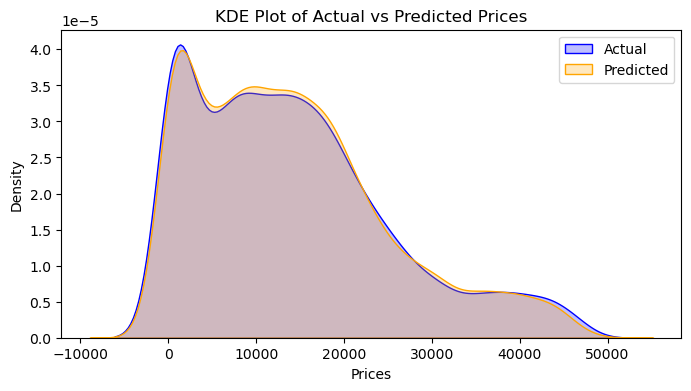

In [12]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y_eval, 'Predicted': y_eval_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

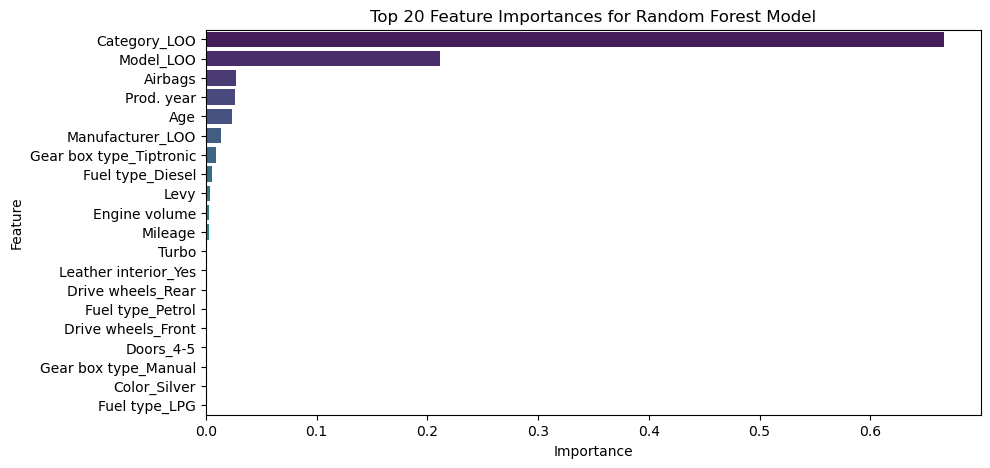

In [13]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the column names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Encoding Option #3

3) Target encoding Manufacturer, Model and Category. Rest is one hot encoded

Target Encoding is a technique used in feature engineering for categorical variables in supervised machine learning. It involves replacing categorical values with the average of the target variable for each category. 

The steps are as follows:

For each category in the categorical variable, calculate the mean of the corresponding target variable.
Replace the original categorical value with the computed mean for that category.

Advantages of Target Encoding:

Utilizes Global Information:

Target Encoding incorporates global information about the relationship between the categorical variable and the target, providing a smooth and informative transformation.

Effective Handling of High Cardinality:

Particularly useful for categorical variables with high cardinality, where the number of instances in a category is substantial.

Robust to Outliers:

Target Encoding can be more robust to outliers compared to other encoding methods, as it considers the overall distribution of the target variable.

Applicability to Various Models:

It can be applied to a wide range of machine learning models, making it versatile for different types of predictive modeling tasks.

Potential for Feature Engineering:

Target Encoding can capture valuable information about the relationship between categorical variables and the target, potentially improving the predictive power of the model.

In [14]:
from category_encoders import TargetEncoder

# Initialize the TargetEncoder
encoder = TargetEncoder(cols=['Manufacturer', 'Model', 'Category'])

# Fit and transform on the entire DataFrame
df2_encoded = encoder.fit_transform(df2[['Manufacturer', 'Model', 'Category']], df2['Price'])

# Concatenate the encoded columns with the original DataFrame
df2 = pd.concat([df2.drop(columns=['Manufacturer', 'Model', 'Category']), df2_encoded], axis=1)

df2

,Price,Levy,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age,Manufacturer,Model,Category
0,13328,1399.000000,2010,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0,14,12121.335419,7109.893607,17375.725929
1,16621,1018.000000,2011,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0,13,13763.159647,10774.295890,17375.725929
2,8467,906.299205,2006,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0,18,11129.251942,10780.092971,11041.946063
3,3607,862.000000,2011,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0,0,13,12172.455072,8172.567731,17375.725929
4,11726,446.000000,2014,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0,10,11129.251942,10780.092971,11041.946063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,8467,906.299205,1999,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2-3,Left wheel,Silver,5,1,25,12815.327108,12541.239573,14609.595388
17865,15681,831.000000,2011,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0,13,19088.769051,11848.491559,12431.584876
17866,26108,836.000000,2010,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4-5,Left wheel,Grey,4,0,14,19088.769051,27001.218997,17375.725929
17867,5331,1288.000000,2007,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4-5,Left wheel,Black,4,0,17,13763.159647,17033.617508,17375.725929


In [15]:
# Identify columns with datatype 'object' or 'category'
columns_to_encode = df2.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding with drop_first=True
df2_encoded = pd.get_dummies(df2, columns=columns_to_encode, drop_first=True)


In [16]:
# Loop through columns
for column in df2_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if df2_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        df2_encoded[column] = df2_encoded[column].astype(int)

df2_encoded

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Turbo,Age,Manufacturer,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.000000,2010,3.5,186005.0,6.0,12,0,14,12121.335419,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.000000,2011,3.0,192000.0,6.0,8,0,13,13763.159647,...,0,0,0,0,0,0,0,0,0,0
2,8467,906.299205,2006,1.3,200000.0,4.0,2,0,18,11129.251942,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2011,2.5,168966.0,4.0,0,0,13,12172.455072,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.000000,2014,1.3,91901.0,4.0,4,0,10,11129.251942,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17864,8467,906.299205,1999,2.0,300000.0,4.0,5,1,25,12815.327108,...,0,0,0,0,0,0,1,0,0,0
17865,15681,831.000000,2011,2.4,161600.0,4.0,8,0,13,19088.769051,...,0,0,0,0,0,1,0,0,0,0
17866,26108,836.000000,2010,2.0,116365.0,4.0,4,0,14,19088.769051,...,0,1,0,0,0,0,0,0,0,0
17867,5331,1288.000000,2007,2.0,51258.0,4.0,4,0,17,13763.159647,...,0,0,0,0,0,0,0,0,0,0


## Modelling #3

In [17]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Separate the target variable (Price) and independent variables
X = df2_encoded.drop(columns=['Price','Cylinders'])
y = df2_encoded['Price']

# Split the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the evaluation data using the same scaler
X_eval_scaled = scaler.transform(X_eval)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Models dictionary
models = {'RandomForest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model}

# Results dictionary
results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

# Loop through models
for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Predictions on the scaled training set
    y_train_pred = model.predict(X_train_scaled)

    # Predictions on the scaled evaluation set
    y_eval_pred = model.predict(X_eval_scaled)

    # Calculate MAE and R-squared for training and evaluation sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    # Append results to the dictionary
    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 12508, number of used features: 38
[LightGBM] [Info] Start training from score 14014.610010


,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForest,1272.601282,3299.479567,0.960211,0.759603
1,XGBoost,2535.308608,3658.504709,0.891580,0.749834
2,LightGBM,3536.324914,3952.881672,0.800406,0.734909


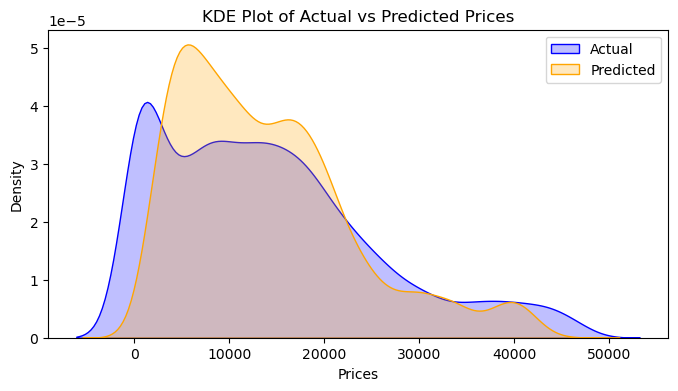

In [18]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y_eval, 'Predicted': y_eval_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

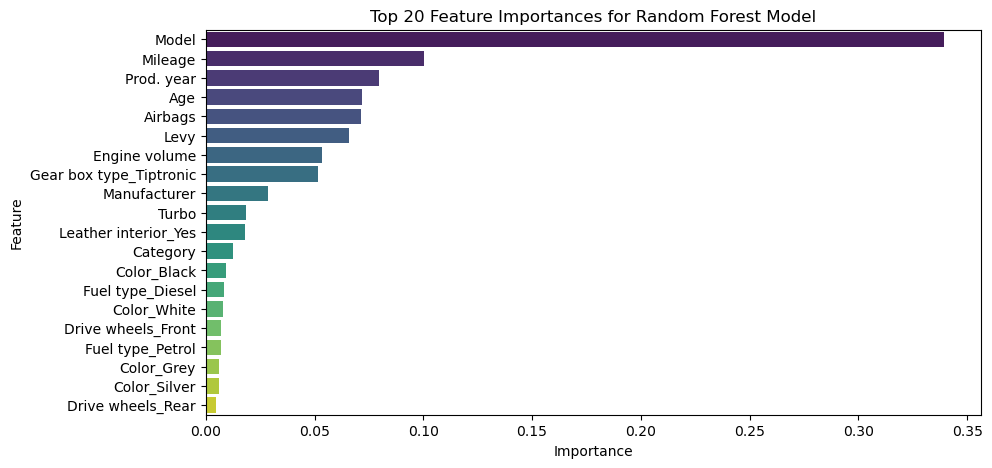

In [19]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the column names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## CONCLUSION

It is interesting to observe that the best result was achieved using Leaveoneout encoding on Manufacturer, Model and Category columns and one hot encoding the rest. Difference is around 16% gain on R2.

In [32]:
# Separate the target variable (Price) and independent variables
X = df1_encoded.drop(columns=['Price','Cylinders'])
y = df1_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=40,shuffle=True)

lgb_model = lgb.LGBMRegressor(random_state=42)

lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"LGBMRegressor R-squared: {r2:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1489
[LightGBM] [Info] Number of data points in the train set: 14295, number of used features: 38
[LightGBM] [Info] Start training from score 14097.920042
LGBMRegressor R-squared: 0.97


In [33]:
# Save the trained model
import pickle

# Save the model to a file
with open("model.pkl", 'wb') as f:
    pickle.dump(lgb_model, f)

# Load the saved model
with open("model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions on the test set using the loaded model
y_pred_lgb_loaded = loaded_model.predict(X_test)
# We make predictions on the test set using the loaded model (loaded_model).
